In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

query = "SELECT * FROM sqlite_master WHERE type='table';"

pd.read_sql_query(query,conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
query2 = "SELECT * FROM facts LIMIT 5;"

pd.read_sql_query(query2,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [4]:
query3 = "SELECT MIN(population) AS min_pop, MAX(population) AS max_pop, MIN(population_growth) AS min_pop_growth, MAX(population_growth) AS max_pop_growth FROM facts"

pd.read_sql_query(query3, conn)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


In [7]:
query4 = "SELECT name FROM facts WHERE population = 0;"
query5 = "SELECT name FROM facts WHERE population = 7256490011;"

pd.read_sql_query(query4, conn)

,name
0,Antarctica


In [8]:
pd.read_sql_query(query5, conn)

,name
0,World


## Findings ##

* It appears the CIA factbook contains a "country" with a population of zero (Antartica), but Antartica is actually a continent
* Additionally, a "country" with population of 7.2 billion is actually a total value of the world's population in 2015


In [10]:
query6 = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE name NOT IN ('Antartica', 'World');"

histogram_data = pd.read_sql_query(query6, conn)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefba354828>


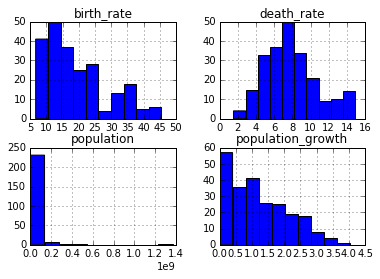

In [14]:
%matplotlib inline
import matplotlib

print(histogram_data.hist())

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefba0cbdd8>]]


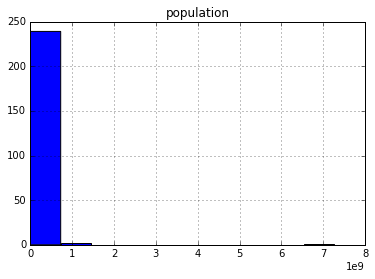

In [15]:
query7 = "SELECT population FROM facts"
histogram_data_2 = pd.read_sql_query(query7, conn)

print(histogram_data_2.hist())